In [88]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from keras.regularizers import l2

In [91]:
df = pd.read_csv('Data.csv')

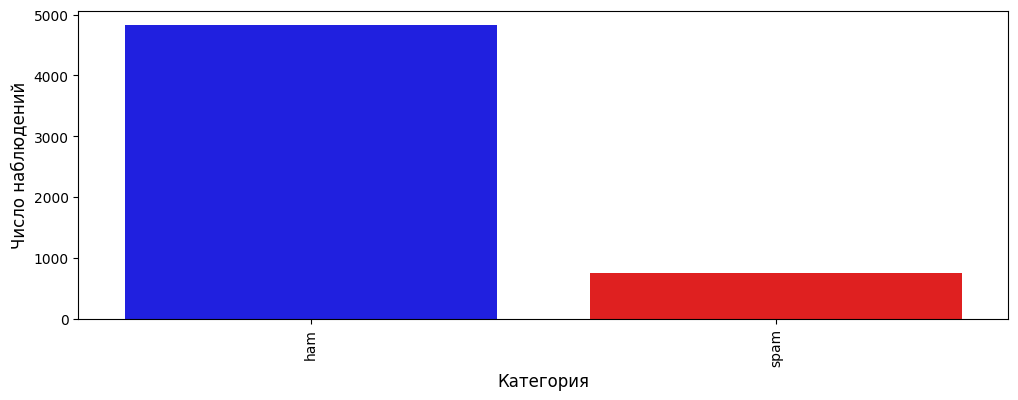

In [113]:
count_text = df['Category'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(count_text, alpha=1, palette=['blue', "red"])
plt.ylabel('Число наблюдений', fontsize=12)
plt.xlabel('Категория', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [20]:
replace_dict = {
    "ham": 0,
    "spam": 1
}

In [21]:
df["Category"] = df["Category"].replace(replace_dict) 
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [22]:
df.to_csv('NewData.csv')

In [24]:
df = pd.read_csv('NewData.csv')

In [25]:
nltk.download('stopwords')
stop_words = stopwords.words("english")
stemmer = SnowballStemmer('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Иван\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

In [27]:
df['Message'] = df['Message'].apply(preprocess_text)

category = df['Category'].values
message = df['Message'].values

In [28]:
tokenizer = Tokenizer(num_words=None, char_level=True, lower=False)
tokenizer.fit_on_texts(message)
sequences = tokenizer.texts_to_sequences(message)

In [128]:
data = pad_sequences(sequences, maxlen=500)

In [129]:
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, 40, input_length=500))
model.add(LSTM(40, dropout=0.1, return_sequences=True))
model.add(LSTM(40, dropout=0.1))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

In [130]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [132]:
history = model.fit(data, category, validation_split=0.3, epochs=10, verbose=1)

Epoch 1/10
122/122 [==============================] - 30s 248ms/step - loss: 0.0932 - accuracy: 0.9782 - val_loss: 0.0884 - val_accuracy: 0.9767
Epoch 2/10
122/122 [==============================] - 30s 248ms/step - loss: 0.0893 - accuracy: 0.9782 - val_loss: 0.0971 - val_accuracy: 0.9749
Epoch 3/10
122/122 [==============================] - 43s 355ms/step - loss: 0.0839 - accuracy: 0.9805 - val_loss: 0.0873 - val_accuracy: 0.9758
Epoch 4/10
122/122 [==============================] - 32s 261ms/step - loss: 0.0872 - accuracy: 0.9795 - val_loss: 0.0894 - val_accuracy: 0.9758
Epoch 5/10
122/122 [==============================] - 34s 275ms/step - loss: 0.0819 - accuracy: 0.9805 - val_loss: 0.0860 - val_accuracy: 0.9758
Epoch 6/10
122/122 [==============================] - 34s 277ms/step - loss: 0.0786 - accuracy: 0.9818 - val_loss: 0.0874 - val_accuracy: 0.9776
Epoch 7/10
122/122 [==============================] - 33s 274ms/step - loss: 0.0791 - accuracy: 0.9805 - val_loss: 0.0971 - val_ac

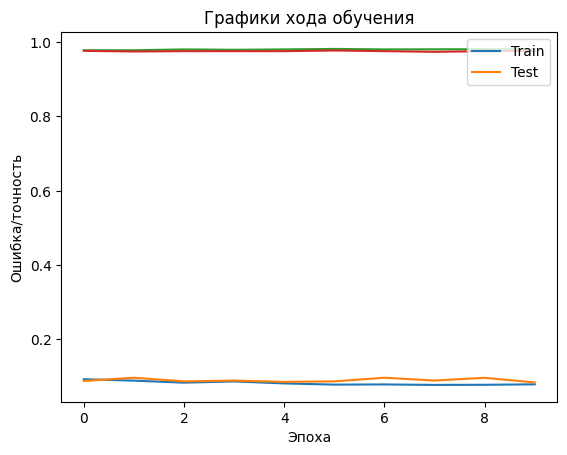

In [136]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Графики хода обучения')
plt.ylabel('Ошибка/точность')
plt.xlabel('Эпоха')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [137]:
#model.save('model_v1')
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 500, 40)           1840      
                                                                 
 lstm_34 (LSTM)              (None, 500, 40)           12960     
                                                                 
 lstm_35 (LSTM)              (None, 40)                12960     
                                                                 
 dense_17 (Dense)            (None, 1)                 41        
                                                                 
Total params: 27801 (108.60 KB)
Trainable params: 27801 (108.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
